<a href="https://colab.research.google.com/github/roshanjain379-ux/SCT_DS_1/blob/main/Internship_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

# Preview dataset
print(train.head())

Train Shape: (891, 12)
Test Shape: (418, 11)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

In [ ]:
print(train.isnull().sum())

# Fill missing Age with median
train["Age"] = train["Age"].fillna(train["Age"].median())

# Fill missing Embarked with mode
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

# Drop Cabin column (too many missing values)
train = train.drop("Cabin", axis=1)

# Drop PassengerId, Ticket, Name (not useful for EDA)
train = train.drop(["PassengerId", "Ticket", "Name"], axis=1)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-1735638527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train, palette="pastel")


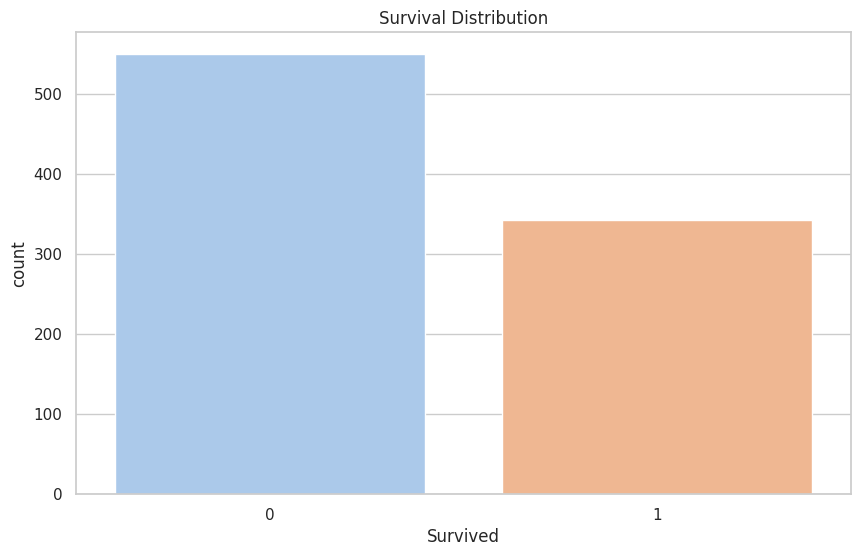

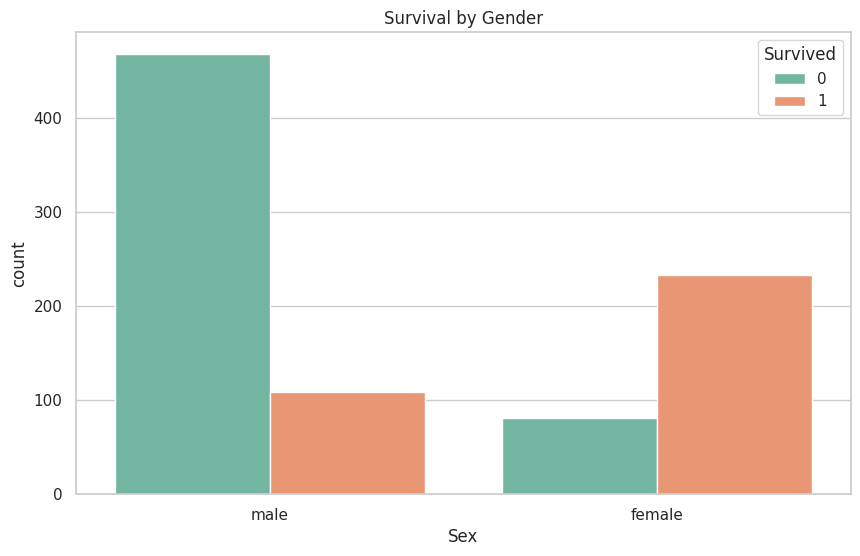

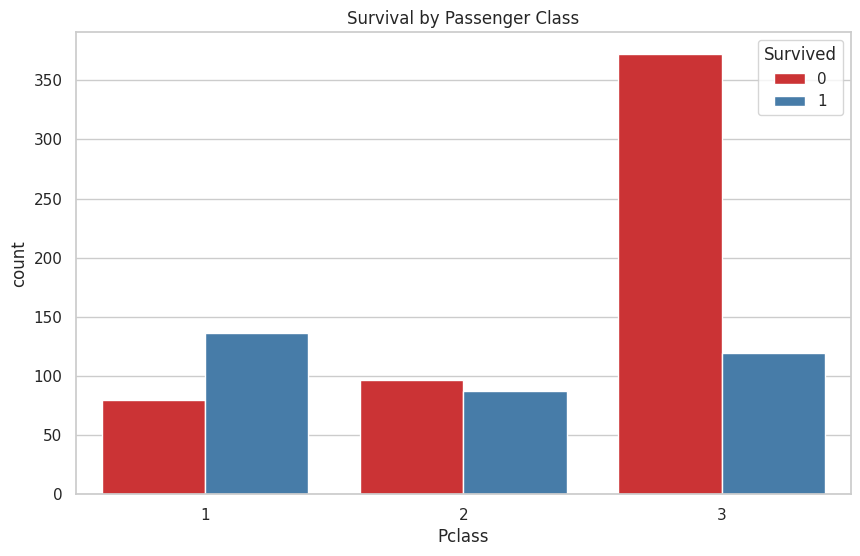

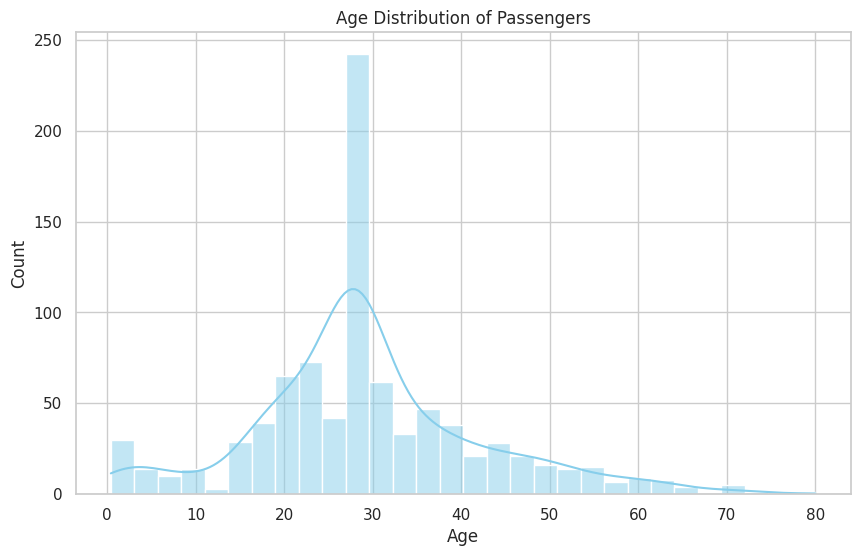

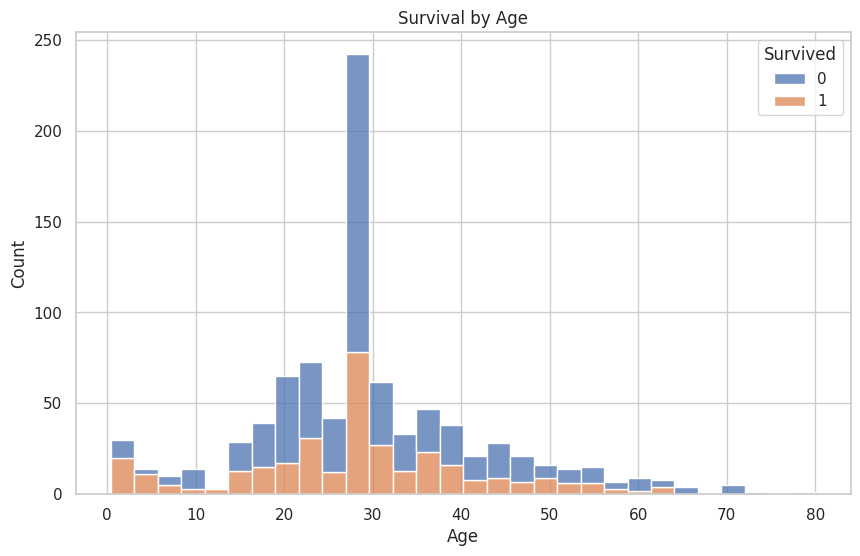

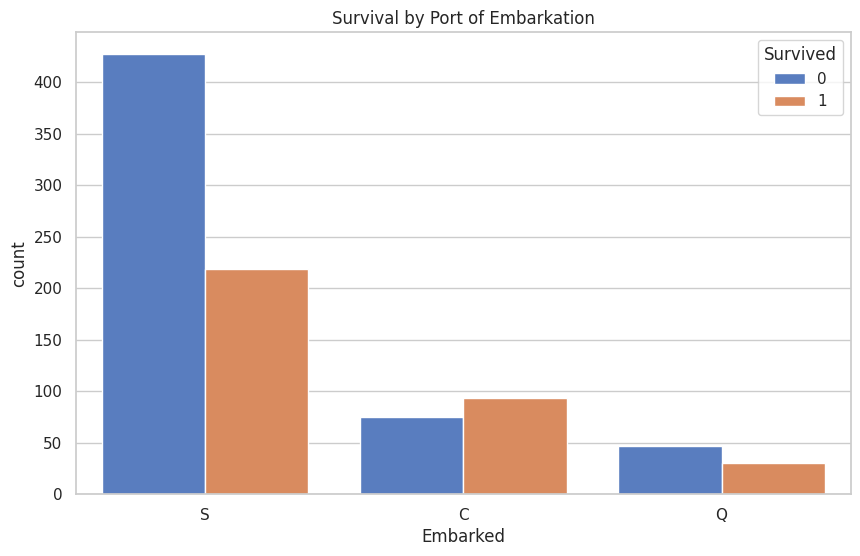

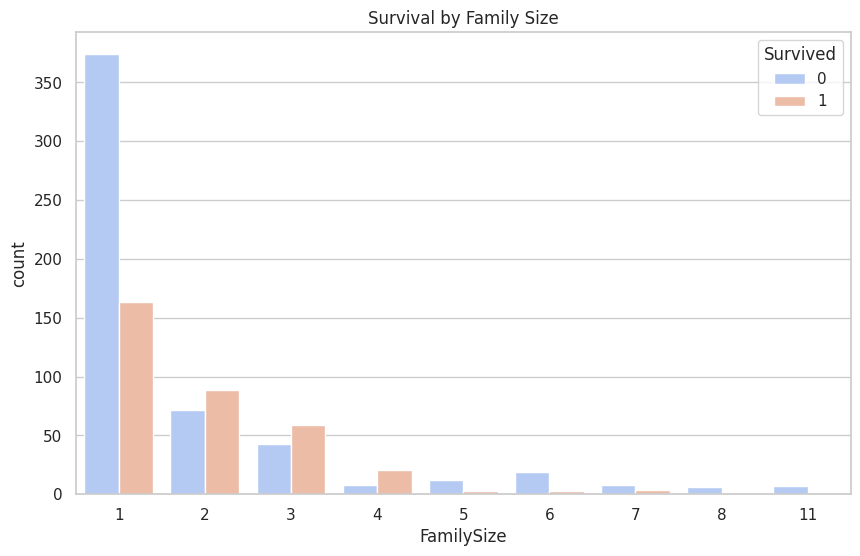

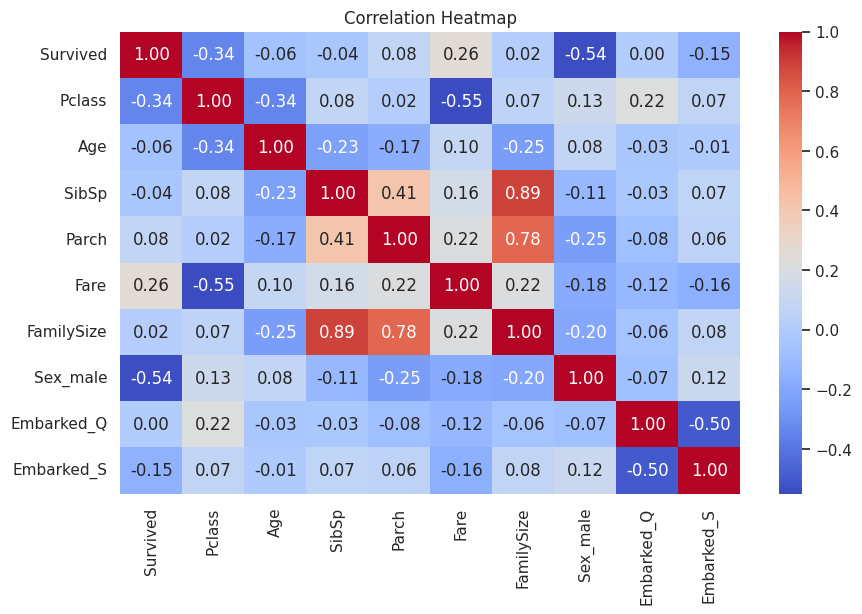

In [ ]:
# 1. Survival Count
sns.countplot(x="Survived", data=train, palette="pastel")
plt.title("Survival Distribution")
plt.show()

# 2. Survival by Gender
sns.countplot(x="Sex", hue="Survived", data=train, palette="Set2")
plt.title("Survival by Gender")
plt.show()

# 3. Survival by Class
sns.countplot(x="Pclass", hue="Survived", data=train, palette="Set1")
plt.title("Survival by Passenger Class")
plt.show()

# 4. Age Distribution
sns.histplot(train["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers")
plt.show()

# 5. Survival by Age
sns.histplot(data=train, x="Age", hue="Survived", bins=30, kde=False, multiple="stack")
plt.title("Survival by Age")
plt.show()

# 6. Survival by Embarked
sns.countplot(x="Embarked", hue="Survived", data=train, palette="muted")
plt.title("Survival by Port of Embarkation")
plt.show()

# 7. Family Size Feature
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
sns.countplot(x="FamilySize", hue="Survived", data=train, palette="coolwarm")
plt.title("Survival by Family Size")
plt.show()

# Convert 'Sex' and 'Embarked' to numerical using one-hot encoding
train = pd.get_dummies(train, columns=["Sex", "Embarked"], drop_first=True)

# 8. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
print("Key Insights:")
print("- Women survived more than men.")
print("- Higher-class passengers had better survival chances.")
print("- Younger passengers had higher survival rates.")
print("- Families with 2-4 members survived more compared to solo travelers or large families.")

Key Insights:
- Women survived more than men.
- Higher-class passengers had better survival chances.
- Younger passengers had higher survival rates.
- Families with 2-4 members survived more compared to solo travelers or large families.
